# Report On COVID Testing at Ontario Correctional Institutions

# Import Libraries

In [59]:
import urllib2
import ssl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
from datetime import datetime, date, timedelta
import pdb

To do:

1) Need to have start date more flexible, set-up kwargs for startdate so default is the beginning of the current month

2) load data onto map of ontario

# Load Testing Data 

In [60]:
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://data.ontario.ca/dataset/c4022f0f-6f3d-4e16-bd28-5312333a4bac/resource/d0d6ccc7-fc60-4a18-ac96-7f9493e9f10e/download/inmatetesting.csv'  

fileobj = urllib2.urlopen(url)

# convert csv into panda DataFrame
from StringIO import StringIO
TESTDATA = StringIO(fileobj.read())

df = pd.read_csv(TESTDATA, sep=",")

#convert dates into datetime timestamps and sort
df['Reported_Date']= pd.to_datetime(df.Reported_Date)
df.sort_values(by=['Reported_Date'], inplace=True, ascending=True)

today = datetime.today()

df.to_csv('ontario_covid_tests_%s.csv'%(today.strftime('%m-%d-%Y')))#%(str(today.strftime('%m-%d-%Y')))

#rename inmates to prisoners 
df.rename(columns={'Total_Inmates_that_Refused_Swab_as_of_Reported_Date':'Total_Prisoners_that_Refused_Swab_as_of_Reported_Date', "Total_Inmates_on_Medical_Isolation_as_of_Reported_Date":"Total_Prisoners_on_Medical_Isolation_as_of_Reported_Date"}, inplace=True)
df

,Reported_Date,Region,Cumulative_Number_of_Tests_as_of_Reported_Date,Cumulative_Number_of_Positive_Tests_as_of_Reported_Date,Cumulative_Number_of_Negative_Tests_as_of_Reported_Date,Total_Number_of_Pending_Tests_on_Reported_Date,Total_Number_of_Unknown_Tests_on_Reported_Date,Total_Prisoners_that_Refused_Swab_as_of_Reported_Date,Total_Prisoners_on_Medical_Isolation_as_of_Reported_Date
0,2020-05-08,Central,330,153,140,30,7,NaN,222
1,2020-05-08,Eastern,84,1,76,7,0,NaN,63
2,2020-05-08,Northern,72,2,63,4,3,NaN,9
3,2020-05-08,Toronto,109,7,90,10,2,NaN,70
4,2020-05-08,Western,82,0,62,17,3,NaN,64
5,2020-05-11,Central,483,154,205,116,8,NaN,223
6,2020-05-11,Eastern,223,1,205,17,0,NaN,40
7,2020-05-11,Northern,140,2,101,35,2,NaN,11
8,2020-05-11,Toronto,121,7,101,11,2,NaN,73
9,2020-05-11,Western,154,0,111,38,5,NaN,52


# Load Data/Variable Definitions used by ONT Government

In [61]:
# print data dictionary provided by solicitor general/data ontario
url = 'https://data.ontario.ca/dataset/c4022f0f-6f3d-4e16-bd28-5312333a4bac/resource/38607e6f-88de-4818-8360-770e1f28d907/download/inmatetesting_data_dictionary.xlsx'  

data_dict = pd.read_excel(url)

data_col = np.arange(2,11,1)

# create function to show data value definitions used by Ontario Government
def show_data_dictionary(): 
    for col in range(len(data_col)):
        print ''
        print "Variable Name: %s" %data_dict.iloc[data_col[col],0]
        print "Variable Definition: %s" %data_dict.iloc[data_col[col],2]
        print "Additional Notes: %s" %data_dict.iloc[data_col[col],3]
        print ''
        
# show variable names and definitions used 
print "Variable Names and the Definitions used by the Ontario government"
show_data_dictionary()

print ''

Variable Names and the Definitions used by the Ontario government

Variable Name: Reported_Date
Variable Definition: Date the information was reported to the Ministry
Additional Notes: None


Variable Name: Region
Variable Definition: Region where the provincial correctional institution is located.
Additional Notes: Institutions are divided into five regions for administrative purposes. Geographic regional boundaries are not available at this time.


Variable Name: Cumulative_Number_of_Tests_as_of_Reported_Date
Variable Definition: Cumulative number of tests that were conducted as measured on "Reported_Date". 
Additional Notes: The data reflects all tests conducted. Individuals may be tested more than once.


Variable Name: Cumulative_Number_of_Positive_Tests_as_of_Reported_Date
Variable Definition: Cumulative number of tests conducted with positive results as measured on "Reported_Date".
Additional Notes: The data is cumulative and reflects the total number of positive test results.
I

# List of Institutions that are part of each region

In [62]:
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://data.ontario.ca/dataset/3ca4505b-091c-4b04-89e8-c316ffaa0d9e/resource/97d82317-539c-479d-9479-4dd9b7e9e08c/download/institutionallocations.csv'  

fileobj = urllib2.urlopen(url)

# convert csv into panda DataFrame
locationdata = StringIO(fileobj.read())

df_location = pd.read_csv(locationdata, sep=",")

In [63]:
def fill_region_institutions(region_institution,region):
    
    for i in range(len(df_location[df_location['Region'] == region]['Institution'])):
        region_institution.append(df_location[df_location['Region'] == region]['Institution'].iloc[i])
    
    return region_institution

In [64]:
Toronto_institutions   = []
Central_institutions  = []
Eastern_institutions  = []
Western_institutions  = []
Northern_institutions = []

regions = ['Toronto','Central','Eastern','Western','Northern']
region_institution = [Toronto_institutions,Central_institutions,Eastern_institutions,Western_institutions,Northern_institutions]

for region in range(len(regions)):
    
    if regions[region] == 'Toronto':
        Toronto_institutions = fill_region_institutions(region_institution=region_institution[region], region=regions[region])
    elif regions[region] == 'Central':
        Central_institutions = fill_region_institutions(region_institution=region_institution[region], region=regions[region])
    elif regions[region] == 'Eastern':
        Eastern_institutions = fill_region_institutions(region_institution=region_institution[region], region=regions[region])
    elif regions[region] =='Western':
        Western_institutions = fill_region_institutions(region_institution=region_institution[region], region=regions[region])
    elif regions[region] == 'Northern':
        Northern_institutions = fill_region_institutions(region_institution=region_institution[region], region=regions[region])

# Create Dataframes for Each Region

In [65]:
regions = ['Toronto','Central','Eastern','Western','Northern']
#regiondfnames = [df_Toronto, df_Central, df_Eastern, df_Western, df_Northern]

for region in range(len(regions)):
    
    if regions[region] == 'Toronto':
        df_Toronto = df[df['Region'] == 'Toronto']
    elif regions[region] == 'Central':
        df_Central = df[df['Region'] == 'Central']
    elif regions[region] == 'Eastern':
        df_Eastern = df[df['Region'] == 'Eastern']
    elif regions[region] =='Western':
        df_Western = df[df['Region'] == 'Western']
    elif regions[region] == 'Northern':
        df_Northern = df[df['Region'] == 'Northern']

In [66]:
def reorganize_region_df(regiondfnames,region):
    
    today = datetime.today()

    # sort values by reported date in ascending order
    regiondfnames.sort_values(by=['Reported_Date'], inplace=True, ascending=True)

    # calculate # of tests since last reported date
    regiondfnames['Number of tests since last reported date']= regiondfnames['Cumulative_Number_of_Tests_as_of_Reported_Date'] - regiondfnames['Cumulative_Number_of_Tests_as_of_Reported_Date'].shift(1)

    # calculate # of positive tests since last reported date
    regiondfnames['Number of positive tests since last reported date']= regiondfnames['Cumulative_Number_of_Positive_Tests_as_of_Reported_Date'] - regiondfnames['Cumulative_Number_of_Positive_Tests_as_of_Reported_Date'].shift(1)

    # calculate # of days since last reported date
    regiondfnames['Number of days since last reported date'] = regiondfnames['Reported_Date'] - regiondfnames['Reported_Date'].shift(1)

    # convert # of days into float
    regiondfnames['Number of days since last reported date'] = regiondfnames['Number of days since last reported date'].dt.days

    # calculate # of tests done per day
    regiondfnames['Number of tests per day'] = regiondfnames['Number of tests since last reported date']/regiondfnames['Number of days since last reported date']

    # calculate # positivity rate
    regiondfnames['Percent Positivity']= (regiondfnames['Number of positive tests since last reported date'] / regiondfnames['Number of tests since last reported date']) * 100
    
    # convert to csv
    regiondfnames.to_csv('%s_covid_tests_%s.csv'%(region,today.strftime('%m-%d-%Y')))#%(str(today.strftime('%m-%d-%Y')))

    return regiondfnames

In [67]:
regions = ['Toronto','Central','Eastern','Western','Northern']
regiondfnames = [df_Toronto, df_Central, df_Eastern, df_Western, df_Northern]

for region in range(len(regions)):
    if regions[region] == 'Toronto':
        df_Toronto =  reorganize_region_df(regiondfnames=regiondfnames[region],region=regions[region])
    elif regions[region] == 'Central':
        df_Central =  reorganize_region_df(regiondfnames=regiondfnames[region],region=regions[region])
    elif regions[region] == 'Eastern':
        df_Eastern =  reorganize_region_df(regiondfnames=regiondfnames[region],region=regions[region])
    elif regions[region] =='Western':
        df_Western =  reorganize_region_df(regiondfnames=regiondfnames[region],region=regions[region])
    elif regions[region] == 'Northern':
        df_Northern =  reorganize_region_df(regiondfnames=regiondfnames[region],region=regions[region])
   

/Users/matt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/matt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/matt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/matt/anaconda/

# Calculate Total Tests for Each Region This Month 

In [68]:
thirtyd = datetime.today() - timedelta(days=32)
yesterday = date.today() - timedelta(days=1)

yestdate = str('%s-%s-%s'%(yesterday.year,yesterday.month,yesterday.day))
startdate = str('%s-%s-%s'%(thirtyd.year,thirtyd.month,thirtyd.day))

In [69]:
np.sum(df_Toronto[(yestdate >= df_Toronto['Reported_Date']) & (df_Toronto['Reported_Date'] >= startdate)]['Number of tests since last reported date'])

291.0

In [78]:
def calculate_total_tests_this_month(regiondfnames,region):
    
    '''Calculates total number of tests done in the month in which this function is run
    
    Function prints out total number of tests and average number of tests by dividing total number of tests
    that occurred in that month and dividing it by total # of days from first of month to last reported date 
    
    '''    
    #today = datetime.today()
    thirtyd = datetime.today() - timedelta(days=30)

    startdate = str('%s-%s-%s'%(thirtyd.year,thirtyd.month,thirtyd.day))

    #print regions[region]
    #print regiondfnames[region]
    #local_dflab = regiondfnames[region]

    #pdb.set_trace()
    #print regiondfnames[regiondfnames['Reported_Date'] >= startdate]['Number of tests since last reported date']

    # calculate total # of tests done in January
    tot_tests = np.sum(regiondfnames[regiondfnames['Reported_Date'] >= startdate]['Number of tests since last reported date']) 

    first_date = regiondfnames[regiondfnames['Reported_Date'] >= startdate]['Reported_Date'].iloc[0]

    #calculate min and max # of tests done on a single reporting period and date

    max_tests = np.max(regiondfnames[regiondfnames['Reported_Date'] >= startdate]['Number of tests since last reported date'])
    date_max_tests = regiondfnames.loc[regiondfnames[regiondfnames['Reported_Date'] >= startdate]['Number of tests since last reported date'].idxmax(), 'Reported_Date']
    min_tests = np.min(regiondfnames[regiondfnames['Reported_Date'] >= startdate]['Number of tests since last reported date'])
    date_min_tests = regiondfnames.loc[regiondfnames[regiondfnames['Reported_Date'] >= startdate]['Number of tests since last reported date'].idxmin(), 'Reported_Date']

    # calculate total # of days from first of month to last reported date 
    #pdb.set_trace()
    timestamp = regiondfnames['Reported_Date'].iloc[-1]
    tot_days = timestamp.date() - date(thirtyd.year,thirtyd.month,thirtyd.day)
    tot_days = int(tot_days.total_seconds()/ timedelta(days=1).total_seconds() + 1)

    # calculate average # of tests 
    avg_tests = tot_tests/tot_days

    # calculate average percent positivity in last week
    avg_positivity = np.nanmean(regiondfnames['Percent Positivity'].iloc[-5:])
    
    # calculate average number of prisoners in medical isolation in last week
    avg_isolation = np.nanmean(regiondfnames['Total_Prisoners_on_Medical_Isolation_as_of_Reported_Date'].iloc[-5:])
    
    recent_isolation = regiondfnames['Total_Prisoners_on_Medical_Isolation_as_of_Reported_Date'].iloc[-1]
    
    last_isolation = regiondfnames['Total_Prisoners_on_Medical_Isolation_as_of_Reported_Date'].iloc[-2]
    
    change_isolation = recent_isolation - last_isolation
    
    print '1. Total Number of Tests at %s institutions from %s to %s: %d tests' %(region, first_date.strftime('%m/%d/%Y'), today.strftime('%m/%d/%Y'), tot_tests) 
    print ''
    print '2. Average Number of Tests per day at %s institutions from %s to %s: %d tests' %(region, first_date.strftime('%m/%d/%Y'), today.strftime('%m/%d/%Y'),avg_tests)
    print ''
    print '3. Number of Tests done since last reporting period: %d tests' %regiondfnames['Number of tests since last reported date'].iloc[-1:]
    print ''
    print '4. Highest Number of tests done during a single reporting period was on %s : %d tests'%(date_max_tests.strftime('%m/%d/%Y'),max_tests)
    print ''
    print '5. Lowest Number of tests done during a single reporting period was on %s: %d tests'%(date_min_tests.strftime('%m/%d/%Y'),min_tests)
    print ''
    print '6. Most recent percent positivity: %d %%'%regiondfnames['Percent Positivity'].iloc[-1:]
    print ''
    print '7. Average percent positivity in the last 5 reporting periods: %d %%'%avg_positivity
    print ''
    print '8. Average number of prisoners under medical isolation in the last 5 reporting periods: %d prisoners'%avg_isolation
    print ''
    print '9. Most recent number of prisoners under medical isolation: %d prisoners'%recent_isolation
    print ''
    print '10. Change in # of prisoners in isolation from last reporting period: %d prisoners'%change_isolation
    print ''

    
    #return startdate, tot_tests, tot_days, avg_tests
    
#calculate_total_tests_this_month()

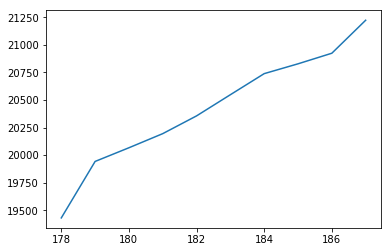

In [79]:
plt.plot(df.groupby(np.arange(len(df))//5).sum()['Cumulative_Number_of_Tests_as_of_Reported_Date'][-10:])
plt.show()

In [80]:
df.groupby(np.arange(len(df))//5).sum()['Cumulative_Number_of_Tests_as_of_Reported_Date'][-2:]

186    20924
187    21223
Name: Cumulative_Number_of_Tests_as_of_Reported_Date, dtype: int64

In [81]:
def ON_total_isolation(regiondfnames):
    tot_isolation = 0
    tot_prev_isolation = 0

    for regiondfname in range(len(regiondfnames)):

        tot_isolation += regiondfnames[regiondfname]['Total_Prisoners_on_Medical_Isolation_as_of_Reported_Date'].iloc[-1]
        tot_prev_isolation += regiondfnames[regiondfname]['Total_Prisoners_on_Medical_Isolation_as_of_Reported_Date'].iloc[-2]

    return tot_isolation, tot_prev_isolation

In [82]:
def ON_total_tests(regiondfnames):
    tot_tests = 0
    tot_prev_tests = 0

    for regiondfname in range(len(regiondfnames)):

        tot_tests += regiondfnames[regiondfname]['Cumulative_Number_of_Tests_as_of_Reported_Date'].iloc[-1]
        tot_prev_tests += regiondfnames[regiondfname]['Cumulative_Number_of_Tests_as_of_Reported_Date'].iloc[-2]

    return tot_tests, tot_prev_tests

In [83]:
regions = ['Toronto','Central','Eastern','Western','Northern']
regiondfnames = [df_Toronto, df_Central, df_Eastern, df_Western, df_Northern]
region_institutions = [Toronto_institutions, Central_institutions, Eastern_institutions, Western_institutions, Northern_institutions]

tot_isolation, tot_prev_isolation = ON_total_isolation(regiondfnames)
tot_tests, tot_prev_tests = ON_total_tests(regiondfnames)

print "Today's date:", datetime.today()
print "Data pulled from Data Catalogue of Solicitor General"
print "see: https://data.ontario.ca/dataset/covid-19-testing-of-inmates-in-ontario-s-correctional-institutions"
print ''

print "***********REPORT STATUS FOR %s***********"%datetime.today()
print ''
print 'KEY STATS:'
print ''
print "Total # of prisoners in isolation: %d"%tot_isolation
print "Change in # of prisoners in isolation from last reporting period: %d"%(tot_isolation - tot_prev_isolation)
print ''
print "Total # of tests to date: %d"%tot_tests
print "Change in # of tests from last reporting period: %d"%(tot_tests - tot_prev_tests)
print ''

for region in range(len(regions)):
    print 'Report for %s Region Institutions which include:'%(regions[region])
    print '%s'%region_institutions[region]
    print ''
    calculate_total_tests_this_month(regiondfnames=regiondfnames[region],region=regions[region])



Today's date: 2021-02-14 00:00:44.292570
Data pulled from Data Catalogue of Solicitor General
see: https://data.ontario.ca/dataset/covid-19-testing-of-inmates-in-ontario-s-correctional-institutions

***********REPORT STATUS FOR 2021-02-14 00:00:44.293036***********

KEY STATS:

Total # of prisoners in isolation: 1138
Change in # of prisoners in isolation from last reporting period: -124

Total # of tests to date: 21223
Change in # of tests from last reporting period: 299

Report for Toronto Region Institutions which include:
['Toronto East Detention Centre', 'Toronto Intermittent Centre', 'Toronto South Detention Centre']

1. Total Number of Tests at Toronto institutions from 01/17/2021 to 02/13/2021: 263 tests

2. Average Number of Tests per day at Toronto institutions from 01/17/2021 to 02/13/2021: 9 tests

3. Number of Tests done since last reporting period: 3 tests

4. Highest Number of tests done during a single reporting period was on 02/03/2021 : 31 tests

5. Lowest Number of te

In [86]:
%%capture cap --no-stderr

regions = ['Toronto','Central','Eastern','Western','Northern']
regiondfnames = [df_Toronto, df_Central, df_Eastern, df_Western, df_Northern]
region_institutions = [Toronto_institutions, Central_institutions, Eastern_institutions, Western_institutions, Northern_institutions]

tot_isolation, tot_prev_isolation = ON_total_isolation(regiondfnames)

print "Today's date:", datetime.today()
print "Data pulled from Data Catalogue of Solicitor General"
print "see: https://data.ontario.ca/dataset/covid-19-testing-of-inmates-in-ontario-s-correctional-institutions"
print ''

print "***********REPORT STATUS FOR %s***********"%datetime.today()
print ''
print 'KEY STATS:'
print ''
print "Total # of prisoners in isolation: %d"%tot_isolation
print "Change in # of prisoners in isolation from last reporting period: %d"%(tot_isolation - tot_prev_isolation)
print ''
print "Total # of tests to date: %d"%tot_tests
print "Change in # of tests from last reporting period: %d"%(tot_tests - tot_prev_tests)
print ''

for region in range(len(regions)):
    print 'Report for %s Region Institutions which include:'%(regions[region])
    print '%s'%region_institutions[region]
    print ''
    calculate_total_tests_this_month(regiondfnames=regiondfnames[region],region=regions[region])

with open('ON_COVID_testing_ontario_corrections_report_%s.txt'%today.strftime("%d-%m-%Y"), 'w') as f:
    f.write(cap.stdout)

In [87]:
print "Total # of prisoners in isolation: %d"%tot_isolation
print "Change in # of prisoners in isolation from last reporting period: %d"%(tot_isolation - tot_prev_isolation)

Total # of prisoners in isolation: 1138
Change in # of prisoners in isolation from last reporting period: -124
